 # Stocks Price Predictor


In [1]:
import pandas as pd

In [2]:
stocks = pd.read_csv("data.csv")

In [3]:
stocks.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1231 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [5]:
stocks['High'].value_counts()

135.0    9
154.5    7
125.0    6
121.0    6
143.0    6
        ..
155.5    1
158.0    1
176.6    1
289.8    1
166.7    1
Name: High, Length: 863, dtype: int64

In [6]:
# median = stocks["stocks"].median()
stocks.shape

(1235, 8)

In [7]:
stocks.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1231.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.701665,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.375871,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.500000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.450000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,168.250000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Last'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Total Trade Quantity'}>],
       [<AxesSubplot:title={'center':'Turnover (Lacs)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

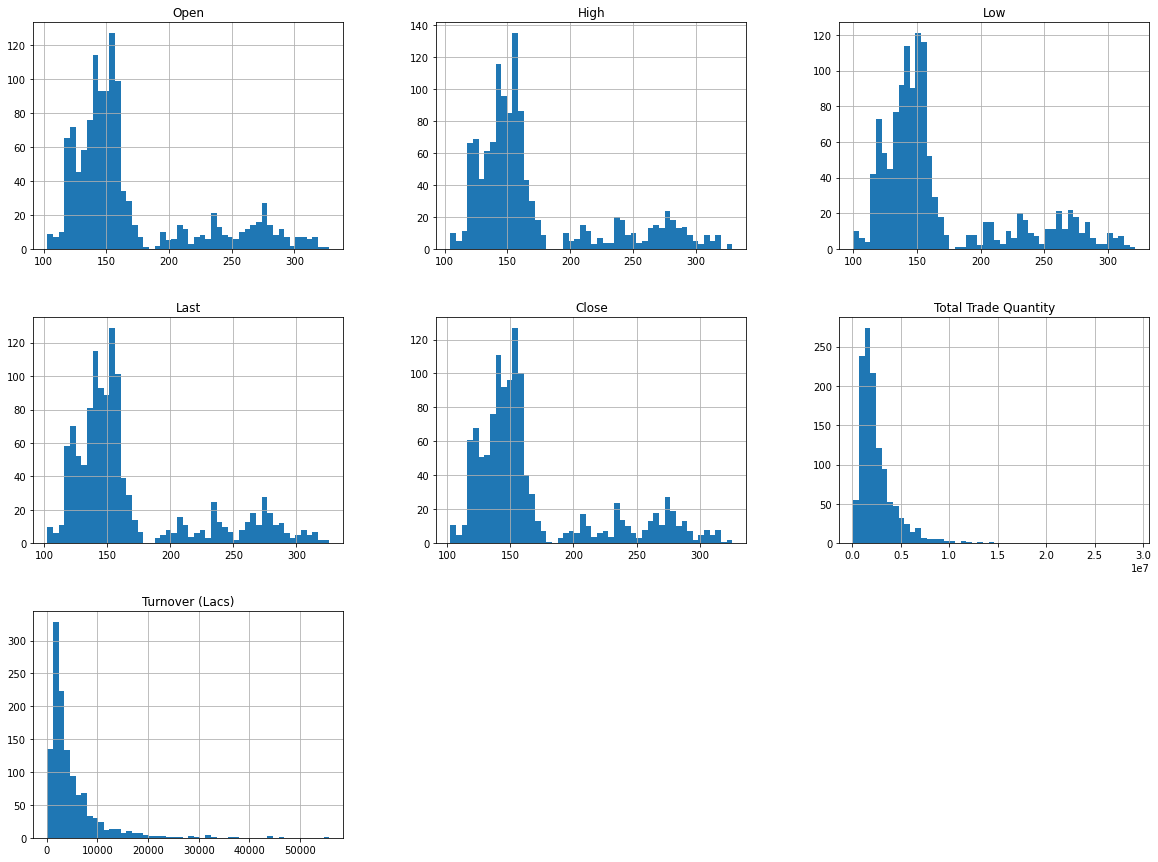

In [10]:
stocks.hist(bins = 50, figsize=(20,15))

# Train-Test Splitting

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
#     print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],  data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(stocks, 0.2)

In [13]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 988
Rows in test set: 247


# This splitting can also be done through sklearn

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stocks, test_size = 0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 988
Rows in test set: 247


This below is done for even distibution of a particular feature

In [15]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state =42)
# for train_index, test_index in split.split(stocks,stocks['Open']):
#     strat_train_set = stocks.loc[train_index]
#     strat_test_set = stocks.loc[test_index]
# Not needed in this case

In [16]:
stocks = train_set.copy()

# Looking for Correlations

In [17]:
corr_matrix = stocks.corr()

High                    1.000000
Close                   0.999151
Last                    0.999108
Open                    0.998996
Low                     0.998720
Turnover (Lacs)         0.605766
Total Trade Quantity    0.381838
Name: High, dtype: float64

array([[<AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='High'>],
       [<AxesSubplot:xlabel='High', ylabel='Total Trade Quantity'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='Total Trade Quantity'>]],
      dtype=object)

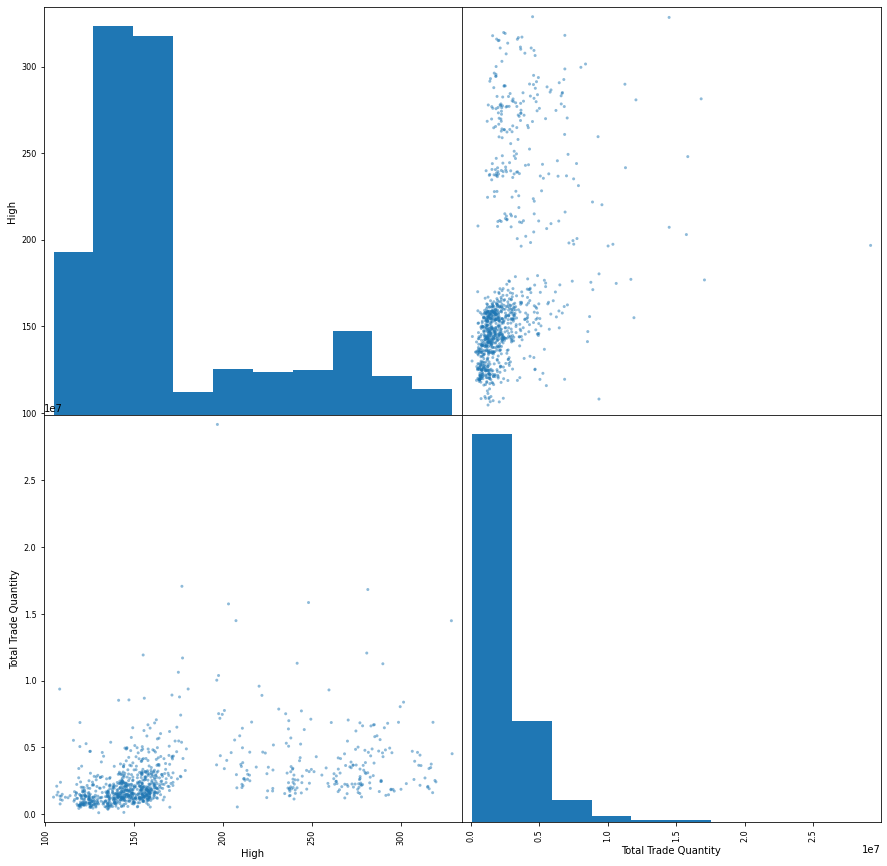

In [19]:
from pandas.plotting import scatter_matrix
attributres = ["High", "Total Trade Quantity"]
scatter_matrix(stocks[attributres],figsize=(15,15))

<AxesSubplot:xlabel='High', ylabel='Total Trade Quantity'>

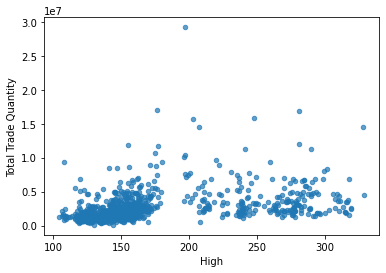

In [20]:
stocks.plot(kind="scatter", x="High", y="Total Trade Quantity", alpha = 0.7)

In [21]:
stocks = train_set.drop("Turnover (Lacs)",axis =1)
stocks_labels = train_set["Turnover (Lacs)"].copy()

In [22]:
 stocks.shape

(988, 7)

In [23]:
a =stocks.drop("Date", axis = 1)
a.shape

(988, 6)

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(a)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([1.5130000e+02, 1.5337500e+02, 1.4945000e+02, 1.5097500e+02,
       1.5080000e+02, 1.9490685e+06])

In [26]:
X = imputer.transform(a)

In [27]:
a_tr = pd.DataFrame(X, columns= a.columns)

In [28]:
a_tr.describe()

,Open,High,Low,Last,Close,Total Trade Quantity
count,988.000000,988.000000,988.000000,988.000000,988.000000,9.880000e+02
mean,168.160526,170.990182,165.979504,168.302379,168.305516,2.577208e+06
std,50.797941,52.006149,50.134236,51.191077,51.166123,2.248380e+06
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05
25%,137.775000,139.212500,135.575000,137.250000,137.450000,1.284603e+06
50%,151.300000,153.375000,149.450000,150.975000,150.800000,1.949068e+06
75%,168.000000,171.562500,165.925000,168.150000,168.125000,3.048694e+06
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07


In [29]:
a.shape

(988, 6)

In [30]:
stocks.shape

(988, 7)

# Creating a Pipeline


In [31]:
from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler()),
])

In [32]:
a_num_tr = my_pipeline.fit_transform(a_tr)

In [33]:
a_num_tr

array([[-0.31927941, -0.36341374, -0.3228871 , -0.31666817, -0.32959411,
        -0.77149562],
       [-0.6373667 , -0.65487298, -0.61824407, -0.63622153, -0.63952628,
        -0.88274399],
       [-0.65509292, -0.67892078, -0.65416586, -0.66162944, -0.67179051,
        -0.68000658],
       ...,
       [-0.48570898, -0.51251005, -0.49251779, -0.49452355, -0.48895987,
         0.14820065],
       [-0.21390684, -0.25471772, -0.29494793, -0.30103253, -0.29439677,
        -0.36668873],
       [-0.43646946, -0.46345256, -0.48054386, -0.50527306, -0.50362543,
        -0.59465084]])

# Selecting a desired model


In [34]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR
reg = RandomForestRegressor()
reg.fit(a_num_tr,stocks_labels)

RandomForestRegressor()

In [35]:
#  inplace= True

In [36]:
some_data = a.iloc[:5]

In [37]:
some_labels= stocks_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
reg.predict(prepared_data)

array([1267.5412,  805.0086, 1398.1238, 1785.4601, 3666.3266])

In [40]:
list(some_labels)

[1273.34, 807.08, 1413.1, 1719.38, 3687.65]

# Evaluating the model


In [41]:
from sklearn.metrics import mean_squared_error
stocks_predictions = reg.predict(a_num_tr)
mse = mean_squared_error(stocks_labels,stocks_predictions)
rmse = np.sqrt(mse)

In [42]:
rmse

426.96375065534306

# Using better evaluation technique - Cross Validation


In [43]:
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, a_num_tr, stocks_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [44]:
rmse_scores

array([ 866.27147037,  376.25754214,  404.09892619,  702.67843167,
        185.64950993,  988.30322834,  185.42593976, 2448.49740615,
        342.21890144,  656.8763745 ])

In [45]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [46]:
print_scores(rmse_scores)

Scores:  [ 866.27147037  376.25754214  404.09892619  702.67843167  185.64950993
  988.30322834  185.42593976 2448.49740615  342.21890144  656.8763745 ]
Mean:  715.6277730495879
Standard deviation:  633.8098697494258



# Saving the model 

In [47]:
from joblib import dump, load
dump(reg, 'Stocks_Price_Predictor')

['Stocks_Price_Predictor']

# Testing the model on test data

In [48]:
X_test = test_set.drop(["Turnover (Lacs)","Date"], axis =1)
Y_test = test_set["Turnover (Lacs)"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = reg.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[ 1606.0519   707.4311  2561.8198  6054.1689  9348.1819  1184.7376
  7810.4448 11339.6706  3017.153  11265.0423  3321.8927 10888.996
  5107.2724  2601.0616 10041.0271  2763.271   1258.9011 14458.4139
  1982.421   2036.6109  4107.7415  2214.3975  4456.9081  7070.0165
  7303.8417  2621.3302 34504.4324  3579.6331  5300.7205   960.4751
  1354.6925  2468.0043  4015.8491  4696.5597   744.1053 15767.6238
  8580.3263 17417.7539  1313.6316  3181.6075  8341.8018 10106.6934
  3435.6874  1545.3529  9031.6039  5442.2898  1268.1443  3344.9792
  7937.2934  5678.2178  1477.5661   795.5808  6851.1664  2753.4912
  3717.622  10400.6455  5180.792   4192.0354 10011.651   2142.615
 11520.4458  4238.9682  2226.0803  3206.7443  5791.5883  6954.5277
  1220.065   3908.9684  3320.4154  6189.9558  8568.2034 35923.9329
  3023.0409  1677.9845  3287.0194  1723.4913  5218.1364  3210.5024
  1955.6887  1767.8486   893.2879  7220.4339  1736.679   2666.1083
  1666.2578  7421.8072 33380.2538  5500.9803  4350.6587  7890.96

In [49]:
final_rmse

691.0076800429753

In [50]:
prepared_data[0]

array([-0.31927941, -0.36341374, -0.3228871 , -0.31666817, -0.32959411,
       -0.77149562])

# Model Usage

In [51]:
from joblib import dump, load
import numpy as np
reg = load('Stocks_Price_Predictor')
features = np.array([[1447, 1455, 1436.2 ,1448.15, 1448.15,
       6.68e4]])
reg.predict(features)

array([49601.281])